In [1]:
# Dependencies
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from api_keys import weather_api_key
import calendar

In [2]:
# File to Load
q1_2018_csv = "Resources/Divvy_Trips_2018_Q1.csv"
q2_2018_csv = "Resources/Divvy_Trips_2018_Q2.csv"
q3_2018_csv = "Resources/Divvy_Trips_2018_Q3.csv"
q4_2018_csv = "Resources/Divvy_Trips_2018_Q4.csv"

# Read School and Student Data File and store into Pandas Data Frames
q1_data = pd.read_csv(q1_2018_csv)
q1_data.head()


q1_data.dtypes
q1_data['start_time'] = pd.to_datetime(q1_data['start_time'])
q1_data['end_time'] = pd.to_datetime(q1_data['end_time'])

q2_data = pd.read_csv(q2_2018_csv)
q3_data = pd.read_csv(q3_2018_csv)
q4_data = pd.read_csv(q4_2018_csv)

In [4]:
q1_data

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:00,3304,323,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,2018-01-01 00:41:00,2018-01-01 00:47:00,5367,377,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0
2,17536704,2018-01-01 00:44:00,2018-01-01 01:33:00,4599,"2,904.00",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0
3,17536705,2018-01-01 00:53:00,2018-01-01 01:05:00,2302,747,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0
4,17536706,2018-01-01 00:53:00,2018-01-01 00:56:00,3696,183,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...
387140,18000522,2018-03-31 23:46:00,2018-04-01 00:05:00,1935,"1,130.00",158,Milwaukee Ave & Wabansia Ave,260,Kedzie Ave & Milwaukee Ave,Subscriber,Male,1982.0
387141,18000523,2018-03-31 23:47:00,2018-03-31 23:52:00,5852,262,299,Halsted St & Roscoe St,229,Southport Ave & Roscoe St,Subscriber,Male,1989.0
387142,18000524,2018-03-31 23:50:00,2018-03-31 23:57:00,4414,440,327,Sheffield Ave & Webster Ave,226,Racine Ave & Belmont Ave,Subscriber,Male,1991.0
387143,18000525,2018-03-31 23:52:00,2018-04-01 00:07:00,6448,887,265,Cottage Grove Ave & Oakwood Blvd,426,Ellis Ave & 60th St,Subscriber,Male,1991.0


In [4]:
#q1_data.start_time.dt.strftime('%m')
q1_data.dtypes
q1_data.start_time.dt.strftime('%m-%y')
q1_data.end_time.dt.strftime('%m-%y')

0         01-18
1         01-18
2         01-18
3         01-18
4         01-18
          ...  
387140    04-18
387141    03-18
387142    03-18
387143    04-18
387144    04-18
Name: end_time, Length: 387145, dtype: object

In [5]:
q2_data.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,18000527,2018-04-01 00:04:44,2018-04-01 00:13:03,3819,499.0,22,May St & Taylor St,171,May St & Cullerton St,Subscriber,Male,1994.0
1,18000528,2018-04-01 00:06:42,2018-04-01 00:27:07,5000,"1,225.0",157,Lake Shore Dr & Wellington Ave,190,Southport Ave & Wrightwood Ave,Subscriber,Male,1965.0
2,18000529,2018-04-01 00:07:19,2018-04-01 00:23:19,5165,960.0,106,State St & Pearson St,106,State St & Pearson St,Customer,NaN,NaN
3,18000530,2018-04-01 00:07:33,2018-04-01 00:14:47,3851,434.0,241,Morgan St & Polk St,171,May St & Cullerton St,Subscriber,Male,1998.0
4,18000531,2018-04-01 00:10:23,2018-04-01 00:22:12,5065,709.0,228,Damen Ave & Melrose Ave,219,Damen Ave & Cortland St,Subscriber,Male,1983.0


In [6]:
divvy_data = [q1_data, q2_data, q3_data, q4_data]

divvy_combined = pd.concat(divvy_data)

divvy_combined

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:00,3304,323,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,2018-01-01 00:41:00,2018-01-01 00:47:00,5367,377,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0
2,17536704,2018-01-01 00:44:00,2018-01-01 01:33:00,4599,"2,904.00",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0
3,17536705,2018-01-01 00:53:00,2018-01-01 01:05:00,2302,747,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0
4,17536706,2018-01-01 00:53:00,2018-01-01 00:56:00,3696,183,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...
642681,21742438,2018-12-31 23:45:17,2018-12-31 23:50:05,2931,288.0,49,Dearborn St & Monroe St,164,Franklin St & Lake St,Subscriber,Female,1983.0
642682,21742439,2018-12-31 23:48:48,2018-12-31 23:57:22,4386,514.0,624,Dearborn St & Van Buren St (*),44,State St & Randolph St,Subscriber,Female,1990.0
642683,21742440,2018-12-31 23:50:09,2018-12-31 23:57:16,4927,427.0,41,Federal St & Polk St,52,Michigan Ave & Lake St,Subscriber,Female,1995.0
642684,21742441,2018-12-31 23:55:04,2018-12-31 23:58:24,1350,200.0,141,Clark St & Lincoln Ave,118,Sedgwick St & North Ave,Subscriber,Male,1999.0


In [40]:
#Question 1- When are the the most Divvy bikes on the road?

#Average rides over 2018

#Bar graph visualization by hour

#By understanding the most common times and routes that divvy operates, the City can decide where to add new bike lanes.


In [ ]:
#Question 2 - What are the most used stops?

#Map 'from station and 'to station' using City of Chicago's Divvy station to map lat/long

#Data from this section will help divvy optimize their bike replenishment routes and ensure that bikes are available where/when needed


In [7]:
# Question 3 - How does weather affect rides? Does ridership change MoM as weather changes?

#make sure start/end time are dates, not objects
divvy_combined.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

In [8]:
#transform objects to dates
divvy_combined['start_time'] = pd.to_datetime(divvy_combined['start_time'])
divvy_combined['end_time'] = pd.to_datetime(divvy_combined['end_time'])

In [9]:
#check again
divvy_combined.dtypes

trip_id                       int64
start_time           datetime64[ns]
end_time             datetime64[ns]
bikeid                        int64
tripduration                 object
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
dtype: object

In [10]:
#copy dataframe and add a month column using start time
divvy_combined_month = divvy_combined

divvy_combined_month['month'] = divvy_combined['start_time'].dt.month

divvy_combined_month

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,month
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:00,3304,323,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,1
1,17536703,2018-01-01 00:41:00,2018-01-01 00:47:00,5367,377,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,1
2,17536704,2018-01-01 00:44:00,2018-01-01 01:33:00,4599,"2,904.00",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,1
3,17536705,2018-01-01 00:53:00,2018-01-01 01:05:00,2302,747,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,1
4,17536706,2018-01-01 00:53:00,2018-01-01 00:56:00,3696,183,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
642681,21742438,2018-12-31 23:45:17,2018-12-31 23:50:05,2931,288.0,49,Dearborn St & Monroe St,164,Franklin St & Lake St,Subscriber,Female,1983.0,12
642682,21742439,2018-12-31 23:48:48,2018-12-31 23:57:22,4386,514.0,624,Dearborn St & Van Buren St (*),44,State St & Randolph St,Subscriber,Female,1990.0,12
642683,21742440,2018-12-31 23:50:09,2018-12-31 23:57:16,4927,427.0,41,Federal St & Polk St,52,Michigan Ave & Lake St,Subscriber,Female,1995.0,12
642684,21742441,2018-12-31 23:55:04,2018-12-31 23:58:24,1350,200.0,141,Clark St & Lincoln Ave,118,Sedgwick St & North Ave,Subscriber,Male,1999.0,12


In [33]:
#divvy_combined_month['month'] = divvy_combined_month['month'].apply(lambda x: calendar.month_abbr[x])

In [11]:
#move month as index
month_count = divvy_combined_month.groupby('month').count()
month_count

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
month,,,,,,,,,,,,
1,109706,109706,109706,109706,109706,109706,109706,109706,109706,109706,106201,106211
2,102950,102950,102950,102950,102950,102950,102950,102950,102950,102950,99550,99580
3,174489,174489,174489,174489,174489,174489,174489,174489,174489,174489,158901,159032
4,200112,200112,200112,200112,200112,200112,200112,200112,200112,200112,178186,178381
5,401150,401150,401150,401150,401150,401150,401150,401150,401150,401150,318267,318796
6,458419,458419,458419,458419,458419,458419,458419,458419,458419,458419,366594,367363
7,544703,544703,544703,544703,544703,544703,544703,544703,544703,544703,422675,423948
8,530755,530755,530755,530755,530755,530755,530755,530755,530755,530755,427855,428946
9,438112,438112,438112,438112,438112,438112,438112,438112,438112,438112,368044,369096


In [83]:
#month_count['month'] = month_count['month'].apply(lambda x: calendar.month_abbr[x])

In [30]:
#need to bring temperature data - either avg temp by month or high/low temp by month  

#https://www.timeanddate.com/weather/usa/chicago/historic?month=5&year=2018
temp_csv = "Resources/Chicago_temp_2018.csv"

In [33]:
temp = pd.read_csv(temp_csv)
temp

,month,high,low,average
0,1,60,-9,27
1,2,66,-1,31
2,3,58,22,37
3,4,80,21,42
4,5,96,45,66
5,6,94,52,71
6,7,95,62,77
7,8,96,60,77
8,9,95,42,70
9,10,88,28,54


In [77]:
temp.set_index('month')

,high,low,average
month,,,
1,60,-9,27
2,66,-1,31
3,58,22,37
4,80,21,42
5,96,45,66
6,94,52,71
7,95,62,77
8,96,60,77
9,95,42,70


In [89]:
months_to_plot = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

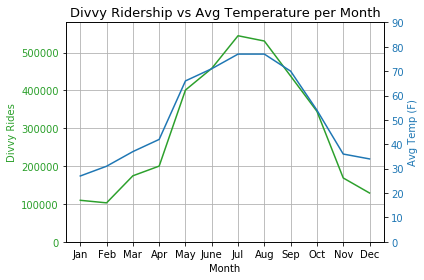

In [114]:
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.plot(months_to_plot, month_count['start_time'], label='Divvy Rides',color=color)
ax1.set_xlabel('Month')
ax1.set_title('Divvy Ridership vs Avg Temperature per Month', fontsize=13)
ax1.grid(True)
ax1.set_ylabel('Divvy Rides',color=color)
ax1.set_ylim(0, 580000)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.plot(temp['average'], label='Avg Temp(F)')
ax2.set_ylabel('Avg Temp (F)',color=color)
ax2.set_ylim(0, 90)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

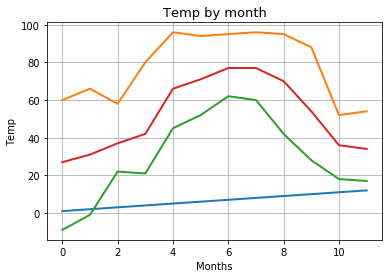

In [78]:
fig, ax = plt.subplots()
plt.plot(temp,linewidth=2.0)
plt.title("Temp by month",fontsize=13)
plt.grid(True)
plt.ylabel('Temp')
plt.xlabel('Months')
#ax.set_xticklabels(np.arange(12), calendar.month_name[1:13])
#plt.legend()
#plt.xticks(
plt.show()

In [29]:
# Question 4 - Demographic Data

#Viz: Pie chart of gender, pie chart of subscriber vs. one time rides, bar chart of rider age

#This data will help inform Divvy's marketing efforts in new subscriber acquisition

In [18]:
gender_count = divvy_combined_month.groupby('gender').count()
gender_count

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,birthyear,month
gender,,,,,,,,,,,,
Female,758736,758736,758736,758736,758736,758736,758736,758736,758736,758736,758708,758736
Male,2281841,2281841,2281841,2281841,2281841,2281841,2281841,2281841,2281841,2281841,2281809,2281841


In [19]:
gender_count.style.format({"trip_id": "{:,}"}) 

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,birthyear,month
gender,,,,,,,,,,,,
Female,"758,736",758736,758736,758736,758736,758736,758736,758736,758736,758736,758708,758736
Male,"2,281,841",2281841,2281841,2281841,2281841,2281841,2281841,2281841,2281841,2281841,2281809,2281841


In [30]:
gender_to_plot = gender_count[gender_count.columns[1:2]] 
gender_to_plot

,start_time
gender,
Female,758736
Male,2281841


In [55]:
#fig, ax = plt.subplots()
#plt.pie(gender_to_plot)


#rides = [24.95, 75.04]

#fig1, ax1 = plt.subplots()
#ax1.pie(rides, labels=labels, autopct='%1.2f%%',shadow=True, startangle=90)
#ax1.title("Divvy Ridership by Gender")
#plt.xticks(
#plt.show()

C:\Users\alerosa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


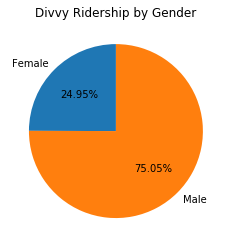

In [53]:
labels= ['Female', 'Male']

plt.pie(gender_to_plot,labels=labels, startangle=90, autopct='%.2f%%')
plt.title('Divvy Ridership by Gender')
plt.show()

In [57]:
divvy_df = pd.DataFrame(divvy_combined.groupby(["from_station_name"])["to_station_name"].count().reset_index())

In [58]:
divvy_df

,from_station_name,to_station_name
0,2112 W Peterson Ave,456
1,63rd St Beach,956
2,900 W Harrison St,6187
3,Aberdeen St & Jackson Blvd,12056
4,Aberdeen St & Monroe St,9875
...,...,...
617,Wood St & Taylor St,5987
618,Woodlawn Ave & 55th St,3488
619,Woodlawn Ave & 75th St,30
620,Woodlawn Ave & Lake Park Ave,1010


In [61]:
divvy_combined

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,month
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:00,3304,323,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,1
1,17536703,2018-01-01 00:41:00,2018-01-01 00:47:00,5367,377,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,1
2,17536704,2018-01-01 00:44:00,2018-01-01 01:33:00,4599,"2,904.00",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,1
3,17536705,2018-01-01 00:53:00,2018-01-01 01:05:00,2302,747,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,1
4,17536706,2018-01-01 00:53:00,2018-01-01 00:56:00,3696,183,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
642681,21742438,2018-12-31 23:45:17,2018-12-31 23:50:05,2931,288.0,49,Dearborn St & Monroe St,164,Franklin St & Lake St,Subscriber,Female,1983.0,12
642682,21742439,2018-12-31 23:48:48,2018-12-31 23:57:22,4386,514.0,624,Dearborn St & Van Buren St (*),44,State St & Randolph St,Subscriber,Female,1990.0,12
642683,21742440,2018-12-31 23:50:09,2018-12-31 23:57:16,4927,427.0,41,Federal St & Polk St,52,Michigan Ave & Lake St,Subscriber,Female,1995.0,12
642684,21742441,2018-12-31 23:55:04,2018-12-31 23:58:24,1350,200.0,141,Clark St & Lincoln Ave,118,Sedgwick St & North Ave,Subscriber,Male,1999.0,12


In [71]:
divvy_combined['tripduration'] = pd.to_numeric(divvy_combined['tripduration'], errors='coerce')

In [72]:
from_station = divvy_combined.groupby('tripduration').mean()
from_station

,trip_id,bikeid,from_station_id,to_station_id,birthyear,month
tripduration,,,,,,
61.0,1.949889e+07,3357.237154,199.553360,198.067194,1984.771300,6.699605
62.0,1.961663e+07,3416.318777,199.742358,205.947598,1985.162437,6.991266
63.0,1.961788e+07,3472.708502,177.886640,186.336032,1983.342466,6.955466
64.0,1.956980e+07,3471.356522,201.621739,209.634783,1983.685990,6.843478
65.0,1.948869e+07,3333.951923,209.793269,215.350962,1983.484375,6.687500
...,...,...,...,...,...,...
995.0,1.966900e+07,3473.726073,182.685149,189.202640,1982.632862,7.061386
996.0,1.965145e+07,3468.319293,186.370924,184.837636,1982.098039,7.050272
997.0,1.964553e+07,3472.691307,194.336756,185.656400,1982.239382,7.019849
